In [46]:
from google.colab import drive
drive.mount('/content/loan_application_approval')

Drive already mounted at /content/loan_application_approval; to attempt to forcibly remount, call drive.mount("/content/loan_application_approval", force_remount=True).


In [47]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the numpy library for numerical computations
import numpy as np

# Importing LabelEncoder for encoding categorical labels into numerical values
# Importing StandardScaler for standardizing/normalizing numerical features
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importing train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing TensorFlow, an open-source machine learning library
import tensorflow as tf

# Importing Sequential, a linear stack of layers for building a neural network
from tensorflow.keras import Sequential

# Importing Dense, a fully connected layer used in neural networks
from tensorflow.keras.layers import Dense

# Importing Dropout, a regularization technique to prevent overfitting by randomly dropping neurons during training
from tensorflow.keras.layers import Dropout

#data viaualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
# Load the dataset
file_path = "/content/loan_application_approval/MyDrive/loan_approval_ann/loan_approval (1).csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
(df.head())

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [49]:
df = pd.read_csv("/content/loan_application_approval/MyDrive/loan_approval_ann/loan_approval (1).csv", index_col=0)
(df.head())

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 433.6+ KB


In [51]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [52]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [53]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


<Figure size 1500x800 with 0 Axes>

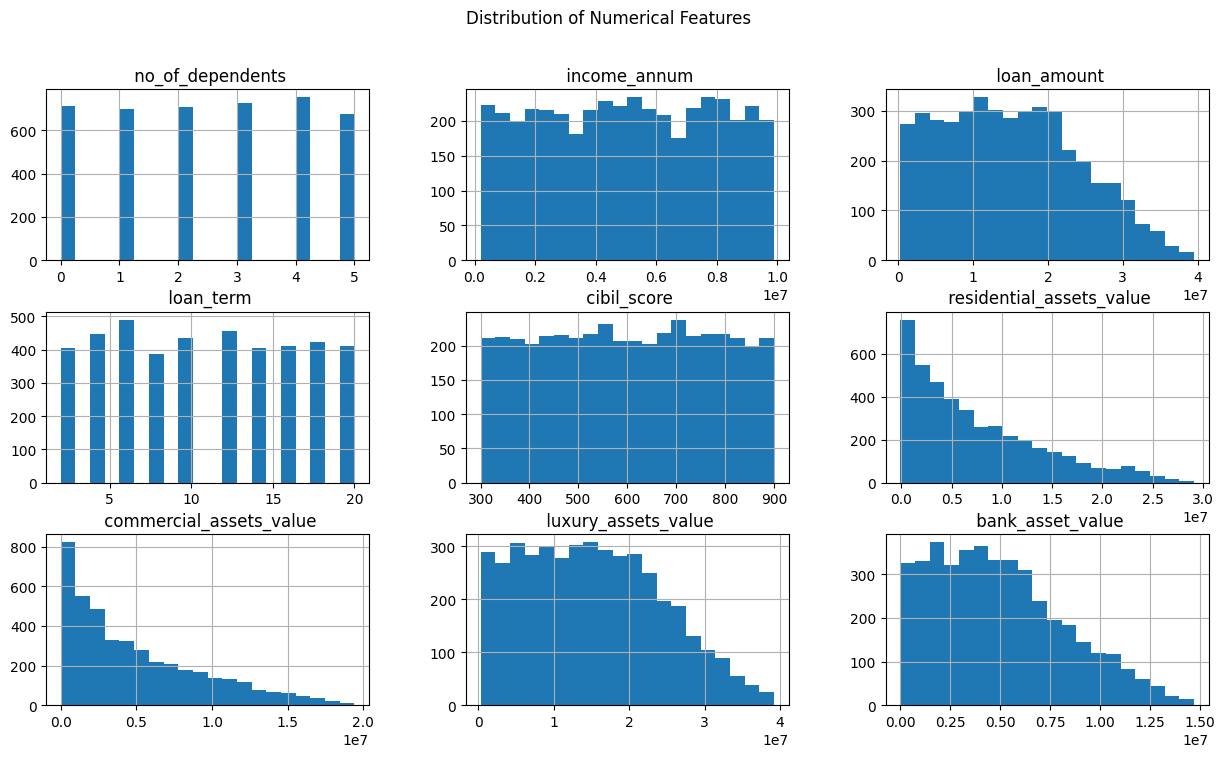

In [54]:
# Check distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
df[numerical_features].hist(bins=20, figsize=(15, 8), layout=(3, 3))
plt.suptitle("Distribution of Numerical Features")
plt.show()


<ipython-input-55-8912d35b742c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="coolwarm")


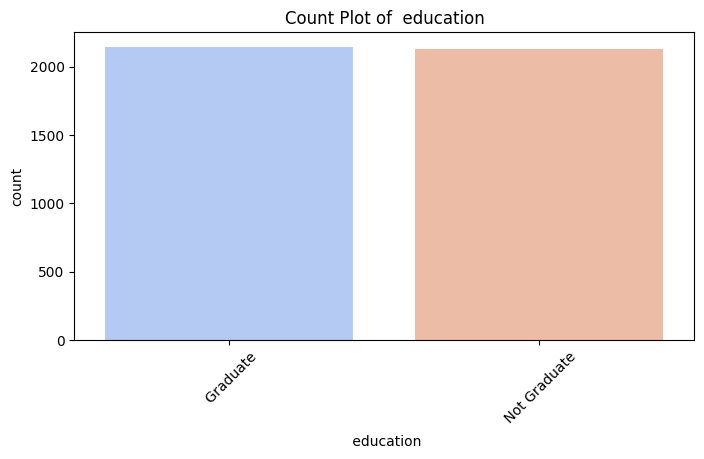

<ipython-input-55-8912d35b742c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="coolwarm")


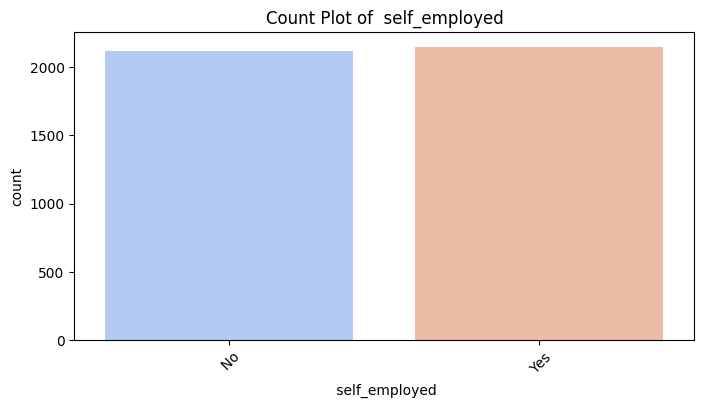

<ipython-input-55-8912d35b742c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="coolwarm")


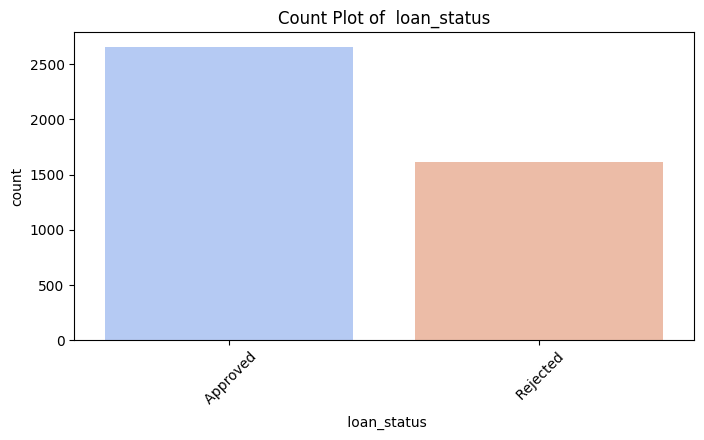

In [55]:
# Categorical feature count plots
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette="coolwarm")
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


<ipython-input-56-f4803b489013>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")


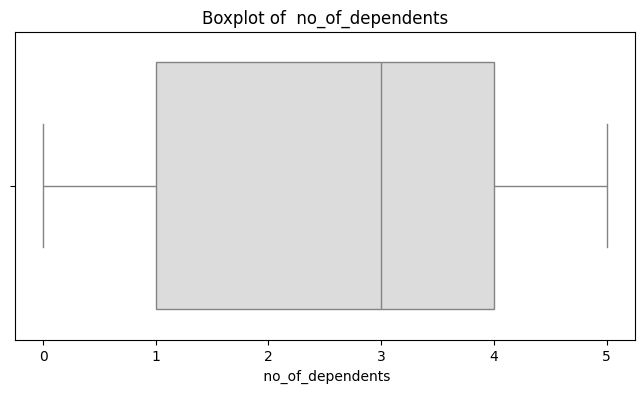

<ipython-input-56-f4803b489013>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")


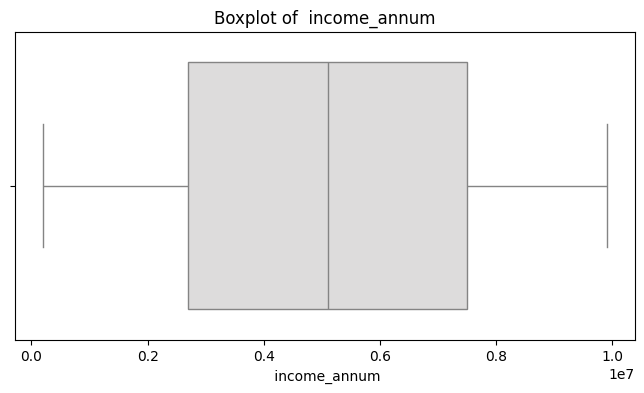

<ipython-input-56-f4803b489013>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")


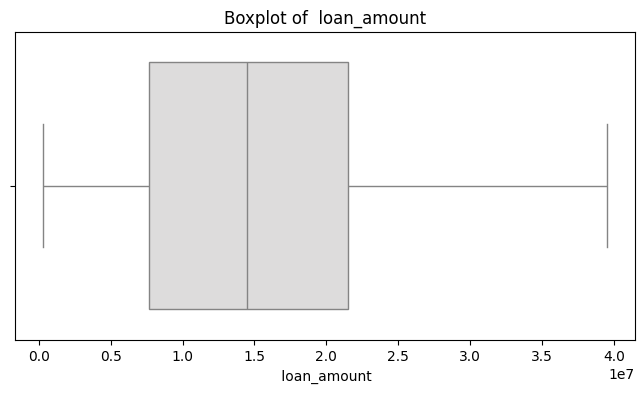

<ipython-input-56-f4803b489013>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")


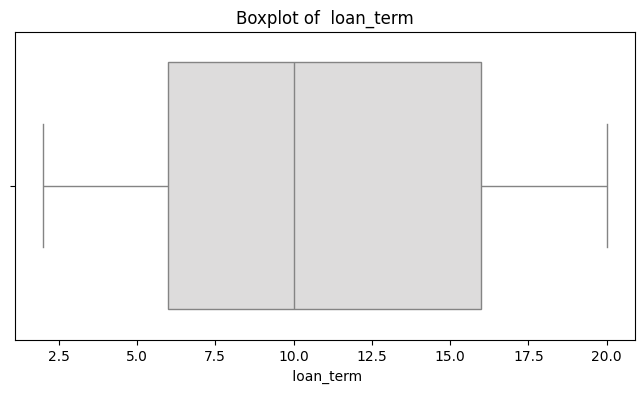

<ipython-input-56-f4803b489013>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")


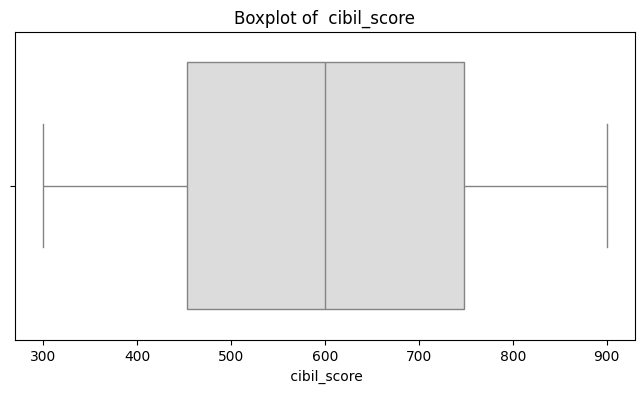

<ipython-input-56-f4803b489013>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")


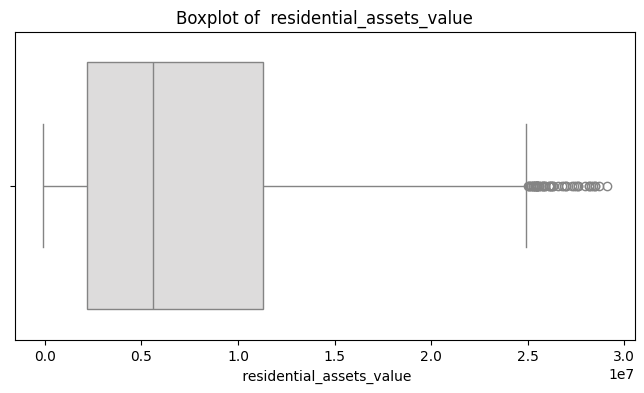

<ipython-input-56-f4803b489013>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")


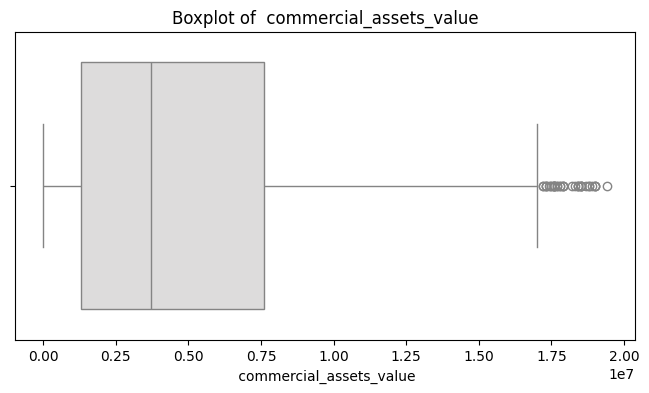

<ipython-input-56-f4803b489013>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")


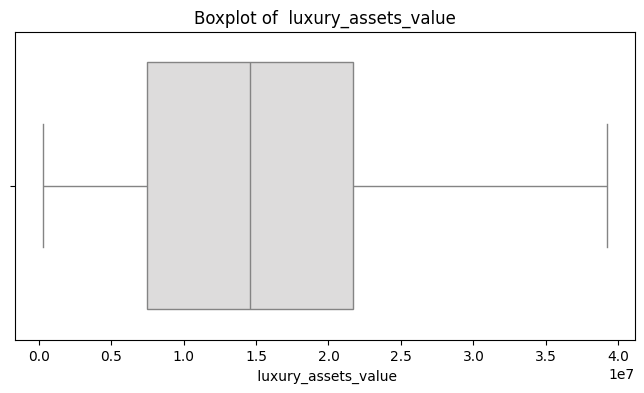

<ipython-input-56-f4803b489013>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")


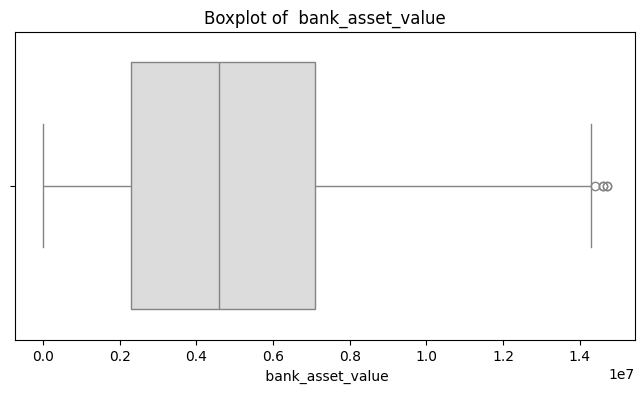

In [56]:
# Outlier detection using boxplots
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], palette="coolwarm")
    plt.title(f"Boxplot of {col}")
    plt.show()


In [57]:
# Detecting outliers using IQR method
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()
display(outliers[outliers > 0])

,0
residential_assets_value,52
commercial_assets_value,37
bank_asset_value,5


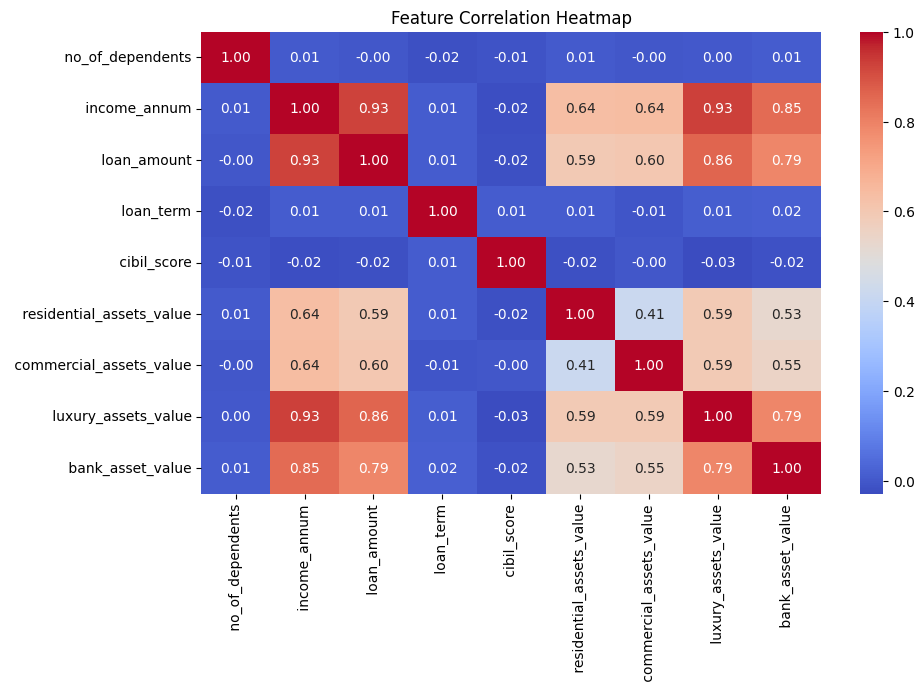

In [58]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [59]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

(df)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected
loan_id,,,,,,,,,,,,
1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,False,False,False
2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,True,True,True
3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,False,False,True
4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,False,False,True
5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,False,True,True
4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,True,True,False
4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,True,False,True


In [60]:
# Showing 5 rows from the dataset
print(df.head())

print("\n")

#Splitting the data into training and testing sets
X = df.drop('loan_status_ Rejected', axis = 1)
y = df['loan_status_ Rejected']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Features/independent variables")
print(X)

print("\n")

print("Target/dependent variable")
print(y)



         no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
loan_id                                                                        
1                       2       9600000     29900000         12          778   
2                       0       4100000     12200000          8          417   
3                       3       9100000     29700000         20          506   
4                       3       8200000     30700000          8          467   
5                       5       9800000     24200000         20          382   

         residential_assets_value  commercial_assets_value  \
loan_id                                                      
1                         2400000                 17600000   
2                         2700000                  2200000   
3                         7100000                  4500000   
4                        18200000                  3300000   
5                        12400000                  8200000   

    

In [61]:
#standardizing the data
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [62]:
#Create the model
model = Sequential([
    Dense(32, activation = 'relu', input_shape = (xtrain.shape[1],)),
    Dropout(0.1),
    Dense(32, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
#Model Compliation
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,473 (5.75 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
#Training the model
model.fit(xtrain, ytrain, epochs = 20, batch_size = 16, validation_data = (xtest, ytest))


Epoch 1/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6515 - loss: 0.6261 - val_accuracy: 0.9028 - val_loss: 0.3054
Epoch 2/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.3362 - val_accuracy: 0.9286 - val_loss: 0.2260
Epoch 3/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9127 - loss: 0.2345 - val_accuracy: 0.9403 - val_loss: 0.1988
Epoch 4/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9209 - loss: 0.2086 - val_accuracy: 0.9368 - val_loss: 0.1891
Epoch 5/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9303 - loss: 0.1958 - val_accuracy: 0.9368 - val_loss: 0.1807
Epoch 6/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9219 - loss: 0.1984 - val_accuracy: 0.9403 - val_loss: 0.1789
Epoch 7/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9346 - loss: 0.1601 - val_accuracy: 0.9450 - val_loss: 0.1697
Epoch 8/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9407 - loss: 0.1512 - val_accuracy: 0.

In [65]:
# Model Results
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9589 - loss: 0.1187 
Test loss: 0.1253
Test accuracy: 0.9660


In [66]:
from tensorflow.keras.models import load_model

# Save the model
model.save('/content/loan_approval_model.h5')

In [67]:
import numpy as np
import pandas as pd

# Define the correct feature order (excluding loan_status and loan_id)
feature_columns = [
    "no_of_dependents", "income_annum", "loan_amount", "loan_term",
    "cibil_score", "residential_assets_value", "commercial_assets_value",
    "luxury_assets_value", "bank_asset_value", "education_ Not Graduate",
    "self_employed_ Yes"
]

# Prepare new data without 'loan_id' and with correct encoding
new_data = np.array([[2, 9600000, 29900000, 12, 778, 2400000, 17600000, 22700000, 8000000, 0, 0]])

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data, columns=feature_columns)

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data_df)

# Predict using the trained model
prediction = model.predict(new_data_scaled)

# Convert probability to class (0 or 1)
predicted_class = (prediction > 0.5).astype(int)

print(f'Prediction: {predicted_class[0][0]}')

if predicted_class == 1:
    print("Loan Approved ")
else:
    print("Loan Rejected ")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction: 0
Loan Rejected 


In [68]:
import numpy as np
import pandas as pd

# Define the correct feature order (excluding loan_status and loan_id)
feature_columns = [
    "no_of_dependents", "income_annum", "loan_amount", "loan_term",
    "cibil_score", "residential_assets_value", "commercial_assets_value",
    "luxury_assets_value", "bank_asset_value", "education_ Not Graduate",
    "self_employed_ Yes"
]

# Using the values that previously resulted in a prediction of 1 (Rejected)
new_data = np.array([[2, 4100000, 12200000, 8, 417, 2700000, 2200000, 8800000, 3300000, 1, 1]])

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data, columns=feature_columns)

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data_df)

# Predict using the trained model
prediction = model.predict(new_data_scaled)

# Convert probability to class (0 or 1)
predicted_class = (prediction > 0.5).astype(int)

print(f'Prediction: {predicted_class[0][0]}')  # Expecting 1 (Rejected)

if predicted_class == 1:
    print("Loan Approved ")
else:
    print("Loan Rejected ")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: 1
Loan Approved 
